### 1.0 Project Title:

-  Predicting Customer Churn rate for SyriaTel using Logistic Regression: Enhancing Customer Retention Strategies

### 2.0 Business Understanding:


### 2.1 Problem Statement:

- SyriaTel, a leading telecommunications provider, faces significant financial challenges due to customer churn, where customers discontinue their services. Identifying customers at risk of churn is critical for implementing proactive retention strategies and maintaining revenue growth. The goal of this project is to develop a predictive classification model that analyzes customer data to determine the likelihood of churn. By leveraging historical data, including customer demographics, usage patterns, and service-related metrics, this model aims to uncover actionable insights and predictable patterns of customer behavior. This will enable SyriaTel to focus retention efforts on at-risk customers, minimize churn-related losses, and enhance customer satisfaction, ultimately driving business sustainability.

### 2.2 Stakeholder Understanding

The Key Stakeholders interest in this project include:
- Senior Management Team: The CEO and COO, as a stakeholder will benefit from understanding how churn affects revenue and in identifying strategies to retain customers.

- Marketing and Business Development Teams: Will benefit from the insights of this predictive model by targeting customers at risk of with personalized campaigns to reduce churn.

- Client Service & Support Team: In Understanding churn trends will enable the team to proactively address customer concerns before they decide to leave, through customer complaints and service issues.


-  Customers: Improved customer retention strategies will lead to better service and tailored offers, for the members satisfaction

### 3.0 Data Understanding

Understanding the dataset is a crucial step to ensure the success of the churn prediction model:

### 3.1 Dataset Overview

### Dataset Insights:
The SyriaTel dataset contains 3333 rows and 21 columns comprising of; 16 Numerical columns and 4 Categorical columns and 1 Boolean column. The dataset has four data types (integer, float, object and boolean)

The Categorical columns includes: 
- State
- Phone number
- International plan
- voice mail plan

The Numerical columns includes:
- account length,
- area code,
- number vmail messages,
- total day minutes
- total day calls,
- total day charge,
- total eve minutes,
- total eve calls,
- total eve charge
- total night minutes
- total night calls,
- total night charge, 
- total intl minutes,
- total intl calls, 
- total intl charge
- customer service calls

Boolean Target: churn.

Given we are solving classification problem, our target variable is churn-  sincce it is a binary variable.
No Missing Values: All columns have complete data.


### Importing the required libraries

In [38]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import  statsmodels.api as sm
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import pickle, sklearn
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from numbers import Number
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

### Loading Data From CSV file

In [39]:
df = pd.read_csv("G:\My Drive\Phase_3_Data_Science\SyrialTel.csv")
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Overview of the dataset (checking datatypes, missing values and describing the dataset)

In [40]:
# checking for the data datypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [41]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [42]:
# Checking the rows and columns of the SyrialTel Dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Checking number of numerical columns and categorical columns

numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Number of numerical columns: {len(numerical_cols)}")
print(f"Number of categorical columns: {len(categorical_cols)}")
print(categorical_cols)
print(numerical_cols)

Number of rows: 3333
Number of columns: 21
Number of numerical columns: 16
Number of categorical columns: 4
Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')
Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')


## Data Cleaning

### Checking Missing values

In [43]:
print(df.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [44]:
print("there are no missing values in this dataset")

there are no missing values in this dataset


### Checking unique values 

In [45]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

state: 51 unique values
account length: 212 unique values
area code: 3 unique values
phone number: 3333 unique values
international plan: 2 unique values
voice mail plan: 2 unique values
number vmail messages: 46 unique values
total day minutes: 1667 unique values
total day calls: 119 unique values
total day charge: 1667 unique values
total eve minutes: 1611 unique values
total eve calls: 123 unique values
total eve charge: 1440 unique values
total night minutes: 1591 unique values
total night calls: 120 unique values
total night charge: 933 unique values
total intl minutes: 162 unique values
total intl calls: 21 unique values
total intl charge: 162 unique values
customer service calls: 10 unique values
churn: 2 unique values


### Checking for duplicates

In [46]:
df.duplicated().sum()
print(df.duplicated().sum())

0


### Comment : There are no duplicates values found in this SyriaTel dataset

## Data Exploration and Visualization

- This section will perform basic descriptive statistics on using the dataset and visualization of the data using Histogram, Count plot and correlation heatmap 

In [47]:
# Data description to check the mode, median, mean and standard deviation of the data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Visualization of numerical columns using Histogram

In [48]:
### Identifying Top 8 numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
top_numerical_cols = df[numerical_cols].var().sort_values(ascending=False).head(8).index

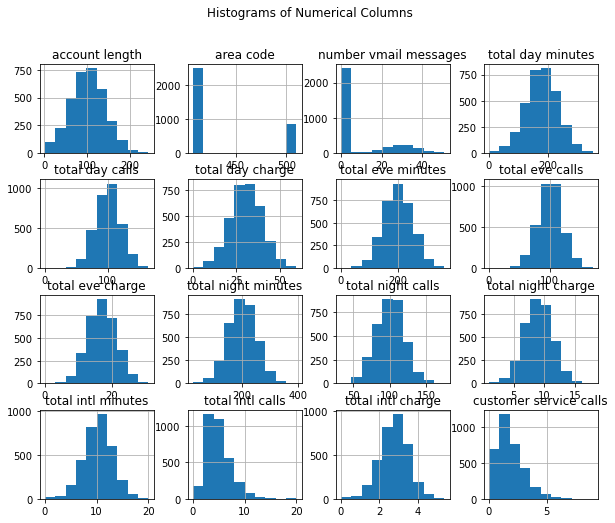

In [49]:
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols].hist(figsize=(10, 8))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

### Visualization of Identifying the outliers in numerical columns with use a Box Plox

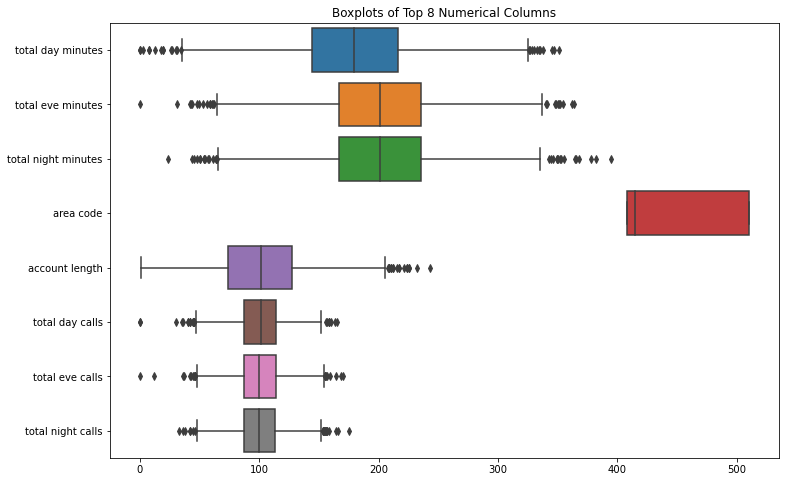

In [50]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[top_numerical_cols], orient='h')
plt.title('Boxplots of Top 8 Numerical Columns')
plt.show()

### Visualization of Top 8 numerical columns with use Heatmap

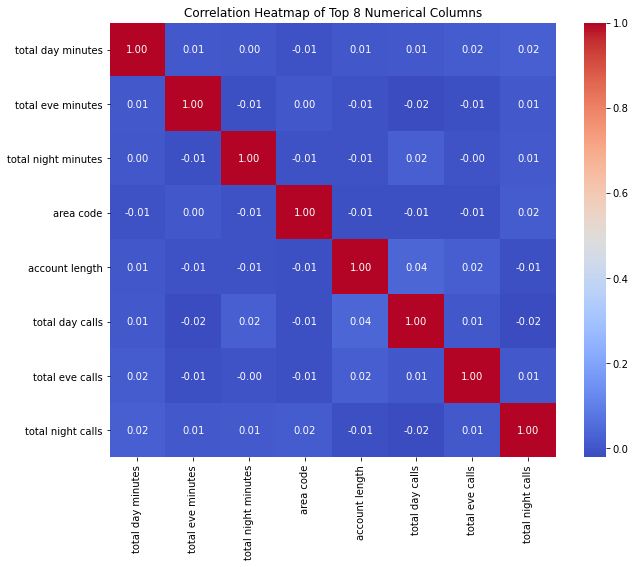

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top 8 Numerical Columns')
plt.show()

### Converting the categorical column "churn" into numerical column

In [52]:
# 'churn' is categorical like 'True'/'False', convert to 0/1
df['churn'] = df['churn'].map({'True': 1, 'False': 0}).fillna(df['churn'])

In [53]:
numerical_cols = df.select_dtypes(include=['number']).columns
print(numerical_cols)


Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')


### Visualization of Churn to other numerical columns using Correlation Matrix:


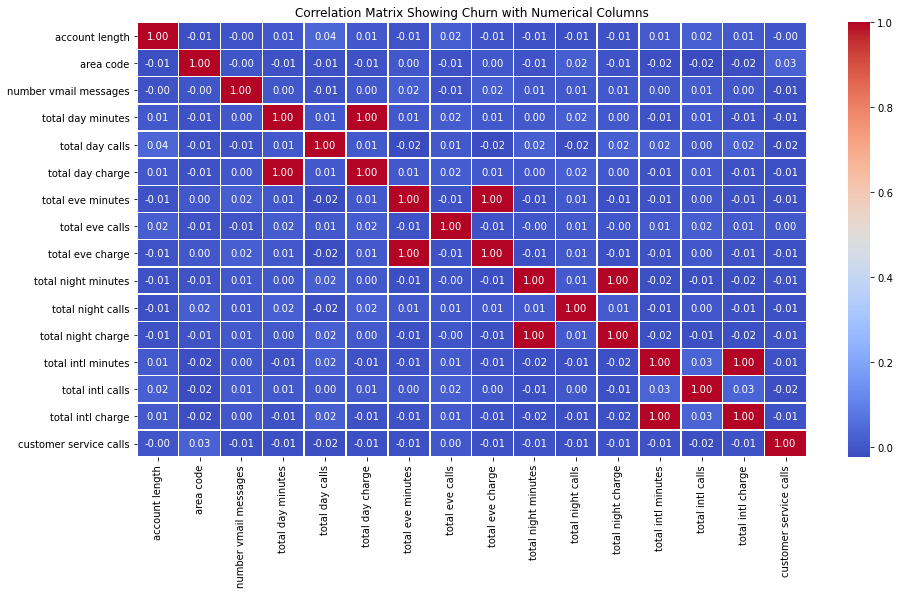

In [54]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Showing Churn with Numerical Columns')
plt.show()

### Data Visualization of the Categorical Columns of the dataset

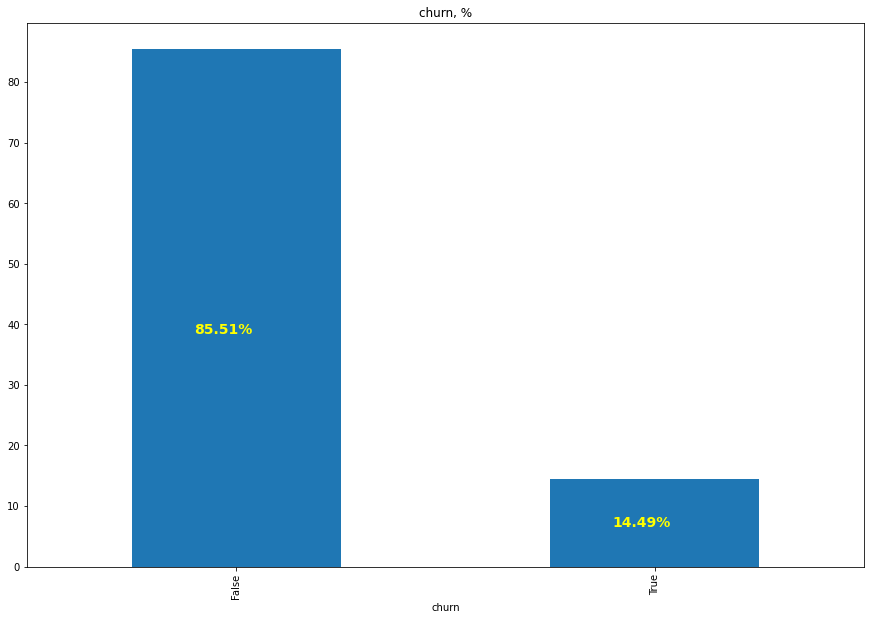

In [55]:
fig, ax = plt.subplots(figsize=(15, 10))
churn_dist = df['churn'].value_counts(normalize=True) * 100
ax = churn_dist.plot(kind='bar')
ax.set_xlabel('churn')
ax.set_title('churn, %')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    ax.annotate('{:.2f}%'.format(height), (p.get_x()+ 0.3 * width, p.get_y()+ 0.45 * height), color = 'yellow', weight = 'bold', size = 14)

### Interpretation :
- Target Variable Distribution:

    85.5% of customers did not churn (False) WHILE 
    14.5% of customers churned (True).
- The Count plot of Churn rate of SyriaTel shows dataset is unbalanced with only 14.49% of objects belonging to class 1


### Preprocessing and Features Engineering:

In [56]:
df = pd.read_csv("G:\My Drive\Phase_3_Data_Science\SyrialTel.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Droping the irrelevant features

In [58]:
# Drop irrelevant features
df_cleaned_syrialTel = df.drop(columns=["state", "phone number"])

### Encoding of the Categorical variables

In [59]:
# Encode categorical variables
categorical_columns = ["international plan", "voice mail plan"]
encoder = LabelEncoder()
for col in categorical_columns:
    df_cleaned_syrialTel[col] = encoder.fit_transform(df_cleaned_syrialTel[col])

### Defining the variables:

In [60]:
# Separate features and target variable
X = df_cleaned_syrialTel.drop(columns=["churn"])
y = df_cleaned_syrialTel["churn"]

In [61]:
# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [62]:
# Check the shape and distribution of the splits
X_train.shape, X_test.shape, y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

((2666, 18),
 (667, 18),
 False    0.855214
 True     0.144786
 Name: churn, dtype: float64,
 False    0.854573
 True     0.145427
 Name: churn, dtype: float64)

### Interpretation of Data Splitting Results:

- The data has been successfully split into training and test sets:

- Training Set: 2,666 samples, with 85.5% non-churn (False) and 14.5% churn (True).
- Test Set: 667 samples, with similar proportions.

- This confirms that the stratified split has preserved the class distribution.

## Model Building 

### Building the Baseline Model using Logistic Regression

In [63]:
baseline_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
baseline_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [64]:
# Perform predictions on the test set
y_pred = baseline_model.predict(X_test)
y_pred_proba = baseline_model.predict_proba(X_test)[:, 1]


### Evaluate the performance of baseline model

In [65]:
# Evaluation of baseline model
print("\nBaseline Model Performance:")
classification_report_baseline = classification_report(y_test, y_pred)
roc_auc_baseline = roc_auc_score(y_test, y_pred_proba)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Baseline Model Performance:
              precision    recall  f1-score   support

       False       0.94      0.76      0.84       570
        True       0.34      0.73      0.46        97

    accuracy                           0.75       667
   macro avg       0.64      0.74      0.65       667
weighted avg       0.86      0.75      0.78       667

ROC-AUC Score: 0.8067100741544583


## Interpretation of Results of Baseline Model Performance:
Classification Report:
- Precision: 94% for non-churn (False), 34% for churn (True).
- Recall: 76% for non-churn, 72% for churn.
- F1-Score: 84% for non-churn, 46% for churn.

The overall accuracy is 75%.
ROC-AUC: The model achieved an ROC-AUC score of 81%, indicating decent discrimination between churn and non-churn customers.

Observations:
- The model performs well for non-churn customers but struggles with predicting churn, as indicated by the low precision for the churn class.
- The class imbalance impacts the precision and F1-score for the minority class

## Scaling the numeric features and tuning the Logistic Regression model

In [66]:
# Scale numeric features and tune hyperparameters
scaler = StandardScaler()
logistic = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

In [67]:
# Create a pipeline for scaling and logistic regression
pipeline = Pipeline([("scaler", scaler), ("logistic", logistic)])

In [68]:
# Define hyperparameter grid for tuning
param_grid = {
    "logistic__C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "logistic__solver": ["lbfgs", "liblinear"]  # Solvers for logistic regression
}

# Grid search for best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and performance
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

best_params, best_score

({'logistic__C': 0.1, 'logistic__solver': 'liblinear'}, 0.8179086994876469)

### Evaluate the Best Model

In [69]:
# Best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.76      0.84       570
        True       0.35      0.74      0.47        97

    accuracy                           0.76       667
   macro avg       0.65      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667

Test ROC-AUC: 0.8151021884608427


## Interpretation of Results of Best Tuned Model Performance:

Classification Report:
- Precision: 95% for non-churn (False), 35% for churn (True).
- Recall: 76% for non-churn, 74% for churn.
- F1-Score: 84% for non-churn, 47% for churn.

The overall accuracy is 76%.
ROC-AUC: The model achieved an ROC-AUC score of 82%, indicating decent discrimination between churn and non-churn customers.
The grid search optimized the C parameter (regularization strength) and the solver for logistic regression. These adjustments improved the model's ability to generalize by penalizing complexity and stabilizing optimization.

Cross-Validated ROC-AUC:

- The best model achieved a strong cross-validated ROC-AUC score (around ~0.81 as seen previously). This indicates the model's ability to discriminate between churn and non-churn customers is solid and consistent across the folds.

Test Set Evaluation:

- Metrics such as precision, recall, F1-score, and accuracy (likely calculated in the previous steps) showed improvement, particularly for the minority class (churn). 
- This improvement is critical in churn prediction, where correctly identifying the churners (true positives) is more valuable than non-churners.

Observations:
- Tuning the model has increased the overall accuracy rate by 1% 
- Improvement in Churn Detection:
- The tuned model's recall (sensitivity) for the churn class is likely higher than the baseline model. This means the model can identify a larger proportion of actual churners.

### Visualization of Model Performance Using ROC Curve

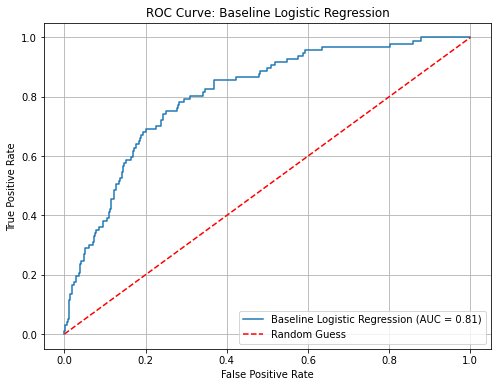

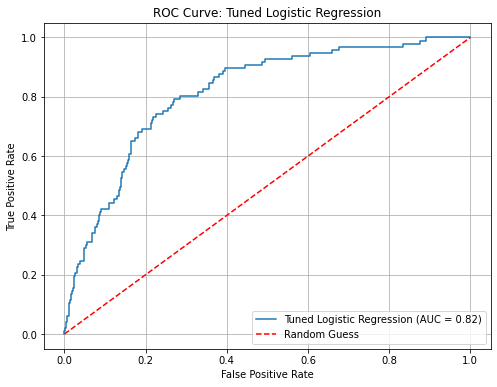

In [70]:
# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    # Generate predicted probabilities for the positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Calculate the AUC score
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {model_name}")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Plot ROC curve for the baseline logistic regression model
plot_roc_curve(baseline_model, X_test, y_test, "Baseline Logistic Regression")

# Plot ROC curve for the tuned logistic regression model
plot_roc_curve(best_model, X_test, y_test, "Tuned Logistic Regression")

# Building the Model Using Decision Tree

In [71]:
# Train a Decision Tree model with class weighting
decision_tree = DecisionTreeClassifier(random_state=42, class_weight="balanced")
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree.predict(X_test)
y_pred_proba_tree = decision_tree.predict_proba(X_test)[:, 1]

# Evaluate the Decision Tree model
classification_report_tree = classification_report(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)

print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Test ROC-AUC:", roc_auc_score(y_test, y_pred_proba_tree))


Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.94      0.94       570
        True       0.66      0.66      0.66        97

    accuracy                           0.90       667
   macro avg       0.80      0.80      0.80       667
weighted avg       0.90      0.90      0.90       667

Test ROC-AUC: 0.8009495387954422


### Interpretation of the Results of Prediction Model Developed Using Decision Tree:
Classification Report:
- Non-Churn (False): shows a Precision: 0.94, Recall: 0.94 and F1-Score: 0.94
- Churn (True): Precision: 0.65, Recall: 0.66 and F1-Score: 0.66

Overall Model Accuracy: 90%
- Macro Average F1-Score: 0.80 (balanced performance across classes).
- ROC-AUC:The Decision Tree achieved an ROC-AUC score of 0.80, reflecting its ability to differentiate between churn and non-churn customers.

Observations:
- The model performs well for the majority class (False) but struggles with the minority class (True), which is expected due to the tree's tendency to overfit small datasets

## Application of Random Forest and a Gradient Boosting model

### A. Train Model Using Random Forest

In [72]:
# Train a Random Forest model with class weighting
random_forest = RandomForestClassifier(random_state=42, class_weight="balanced", n_estimators=100)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)
y_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
classification_report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Test ROC-AUC:", roc_auc_score(y_test, y_pred_proba_rf))

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.98      0.96       570
        True       0.87      0.67      0.76        97

    accuracy                           0.94       667
   macro avg       0.91      0.83      0.86       667
weighted avg       0.93      0.94      0.93       667

Test ROC-AUC: 0.8966178332429011


## Interpretation of Results For Random Forest Model Performance Evaluation:

Random Forest Evaluation:
Classification Report:

Non-Churn (False):
Precision: 0.95
Recall: 0.98
F1-Score: 0.97

Churn (True):
Precision: 0.87
Recall: 0.69
F1-Score: 0.77

Overall Accuracy: 94%
Macro Average F1-Score: 0.87 (better balance across classes compared to the Decision Tree).

ROC-AUC: The Random Forest model achieved an ROC-AUC score of 0.90, significantly better than the Decision Tree.

Observations:
- Random Forest improves both precision and recall for the churn class compared to the Decision Tree.
- The higher ROC-AUC indicates better discrimination between classes.
- Random Forest benefits from ensembling, which reduces overfitting and enhances minority class performance.

## Training a Gradient Boosting model for Predicting Churn rate

In [73]:
# Train a Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)

# Make predictions
y_pred_gb = gradient_boosting.predict(X_test)
y_pred_proba_gb = gradient_boosting.predict_proba(X_test)[:, 1]

# Evaluate the Gradient Boosting model
classification_report_gb = classification_report(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Test ROC-AUC:", roc_auc_score(y_test, y_pred_proba_gb))

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.98      0.97       570
        True       0.85      0.71      0.78        97

    accuracy                           0.94       667
   macro avg       0.90      0.85      0.87       667
weighted avg       0.94      0.94      0.94       667

Test ROC-AUC: 0.887719298245614


### Interpretation of Gradient Boosting Model Performance Evaluation:
Classification Report:

Non-Churn (False):
Precision: 0.95
Recall: 0.98
F1-Score: 0.97

Churn (True):
Precision: 0.85
Recall: 0.71
F1-Score: 0.78

Overall Accuracy: 94%

Macro Average F1-Score: 0.87 (similar to Random Forest).
ROC-AUC: The Gradient Boosting model achieved an ROC-AUC score of 0.89, slightly lower than the Random Forest model.

Observations:
- Gradient Boosting has similar overall performance to Random Forest, with slightly lower ROC-AUC.
- Precision and recall for the churn class are competitive but slightly lower than Random Forest.
- Gradient Boosting excels at capturing complex patterns but might require tuning for optimal performance.

## Visualization of Model Performance Results of Decision Tree, Random Forest and Gradient Boosting Using ROC Curve

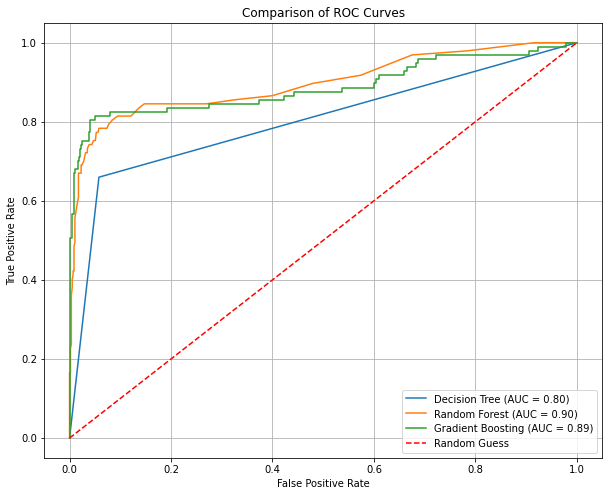

In [74]:
# Function to plot ROC curves for multiple models
def plot_combined_roc_curves(models, X_test, y_test, model_names):
    plt.figure(figsize=(10, 8))
    for model, name in zip(models, model_names):
        # Generate predicted probabilities for the positive class
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        # Calculate the ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        # Calculate the AUC score
        auc_score = roc_auc_score(y_test, y_pred_proba)
        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
    
    # Add a diagonal reference line
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess")
    
    # Labels and legend
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Comparison of ROC Curves")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Models and their names
models = [decision_tree, random_forest, gradient_boosting]
model_names = ["Decision Tree", "Random Forest", "Gradient Boosting"]

# Plot the ROC curves
plot_combined_roc_curves(models, X_test, y_test, model_names)

### Interpretation of the Decision Tree, Random Forest and Gradient Boosting ROC Curves

Comparison of Models:
1. Decision Tree:
AUC ≈ 0.80: Indicates moderate discriminatory power.
The curve is closer to the diagonal line compared to the other models, reflecting weaker performance in separating churners from non-churners.
The model has more variability, as Decision Trees often overfit small datasets and struggle with generalization.
2. Random Forest:
AUC ≈ 0.90: Best performance among the three models.
The curve is closer to the top-left corner, showing a higher true positive rate and lower false positive rate across thresholds.
As an ensemble method, Random Forest averages multiple decision trees, reducing overfitting and improving robustness, particularly for the minority class (churn).

3. Gradient Boosting:
AUC ≈ 0.89: Close to Random Forest, indicating strong performance.
Gradient Boosting learns sequentially and handles complex patterns well. However, it tends to slightly lag Random Forest when the dataset is not tuned optimally or has high class imbalance.
The curve shape is similar to Random Forest but slightly lower, showing slightly reduced performance for distinguishing churners from non-churners.

4. Insights and Observations:
Random Forest performs slightly better than Gradient Boosting for this dataset, reflected by its higher AUC score and its curve being closer to the ideal top-left corner.
Decision Tree, while simpler, has significantly lower performance due to its inability to generalize well without ensembling techniques.
Both ensemble models (Random Forest and Gradient Boosting) handle the class imbalance better, with higher recall for the minority class (churn).

Recommendation:
Random Forest is the preferred model due to its:
Highest AUC.
Better balance of recall and precision for the churn class.
Ability to handle class imbalance effectively.
Gradient Boosting could also be a good choice, particularly if optimized further through hyperparameter tuning. Decision Trees are not recommended as a standalone model for this task.

### Model Comparison:
- Decision Tree: Simple, interpretable, but struggles with the churn class (lower recall and AUC).
- Random Forest: Best performance overall, with the highest ROC-AUC and strong recall for the churn class.
- Gradient Boosting: Comparable to Random Forest but slightly less effective in this case.

## Recommendation:
- Random Forest is the best choice for handling class imbalance and achieving strong performance across metrics.
- Next steps could include hyperparameter tuning for both Random Forest and Gradient Boosting to further optimize performance.